# PART-A

• DOMAIN: Automobile

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

• PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
car_name = pd.read_csv("Car name.csv")    #load carname csv file
car_name.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

## Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [3]:
car_attr = pd.read_json("Car-Attributes.json")    # loading car-attributes json file
car_attr.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

## Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [4]:
car_df = car_name.merge(car_attr,left_index=True,right_index=True)   # merging dataset as car_df
car_df.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [5]:
car_df.tail()

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
393  ford mustang gl  27.0    4  140.0  86  2790  15.6  82       1
394        vw pickup  44.0    4   97.0  52  2130  24.6  82       2
395    dodge rampage  32.0    4  135.0  84  2295  11.6  82       1
396      ford ranger  28.0    4  120.0  79  2625  18.6  82       1
397       chevy s-10  31.0    4  119.0  82  2720  19.4  82       1

## Part 1.1 d - Print 5 point summary of the numerical features and share insights.

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
car_df.describe().T

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

## Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [8]:
car_df.isna().sum()/len(car_df)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

## Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

In [9]:
car_df.duplicated().sum()

0

## Part 1.2 c - Plot a pairplot for all features.

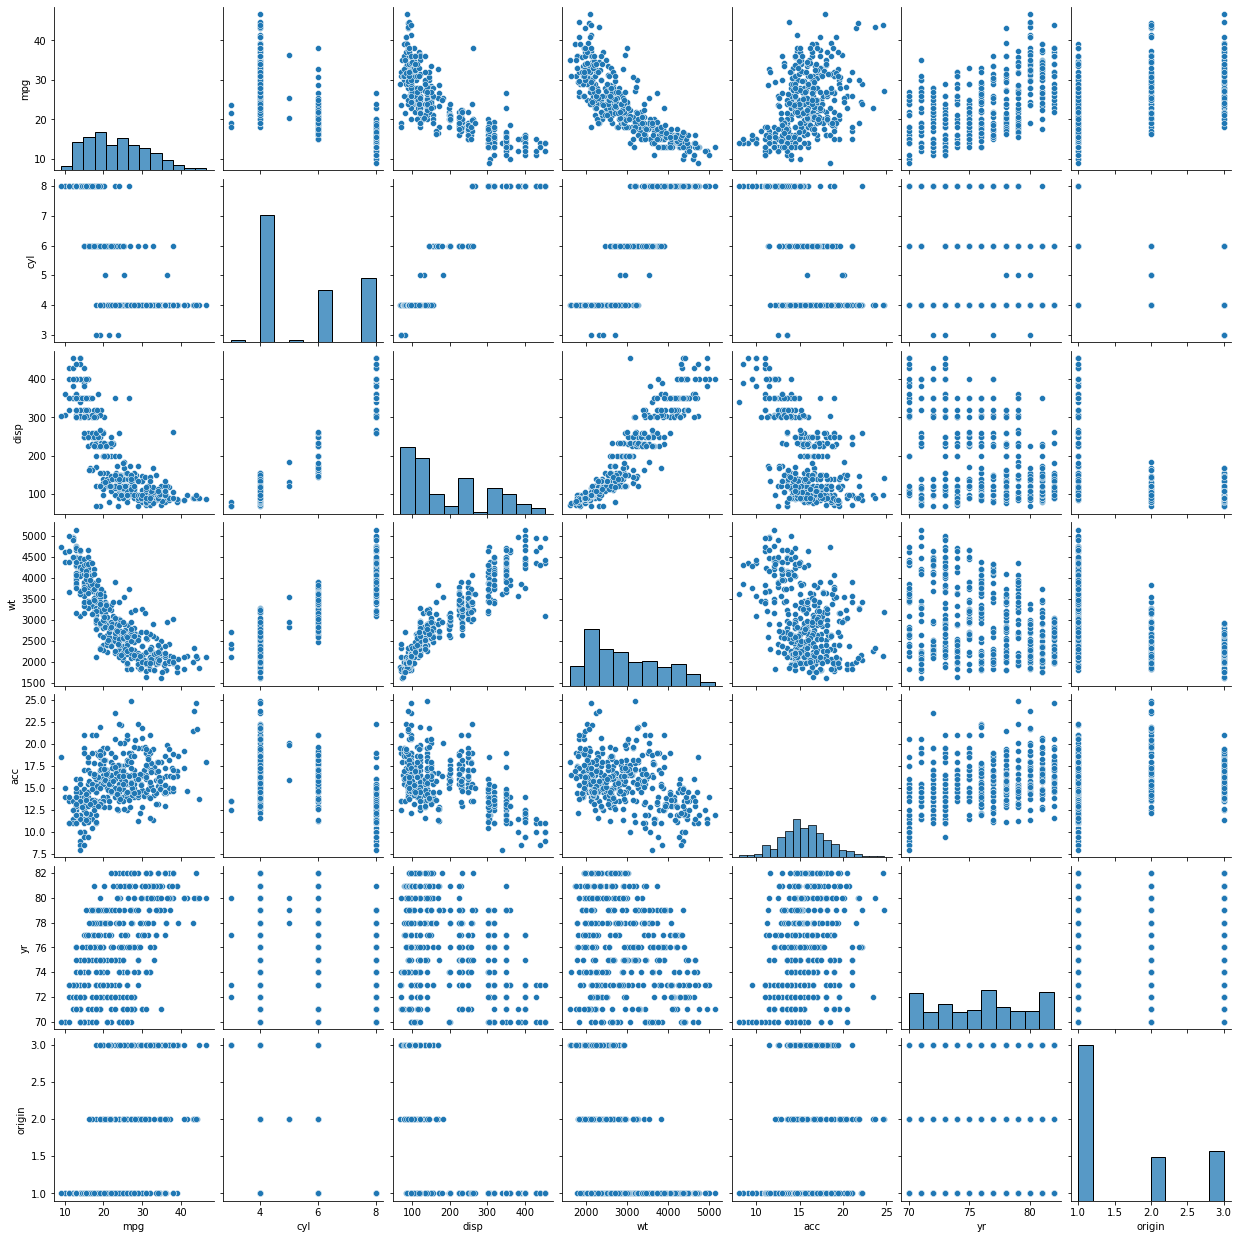

In [10]:
sns.pairplot(car_df);

## Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

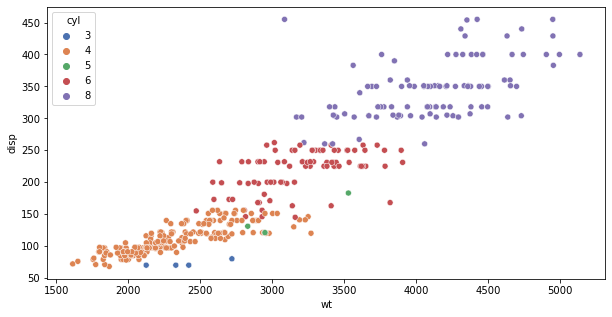

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = car_df,x = 'wt' ,y = 'disp' , hue = 'cyl',palette='deep');

## Part 1.2 e - Share insights for Q2.d.

- The features 'wt' and 'disp' are positively correlated
- At lower scales of both features are the datapoints are closer and as long as the scale increases the datapoints are faraway 
- The 'cyl' class '4' the dataponts are mostly located at lower scales of features and much closer with each other
- The 'cyl' class '6' the datapoints are located in middle scale of features and closer but not much as class '4'
- The 'cyl' class '8' datapoints are located at mid to end of scales of features are little far distributed
- The 'cyl' class '3' and '5' are very less datapoints are observed

## Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

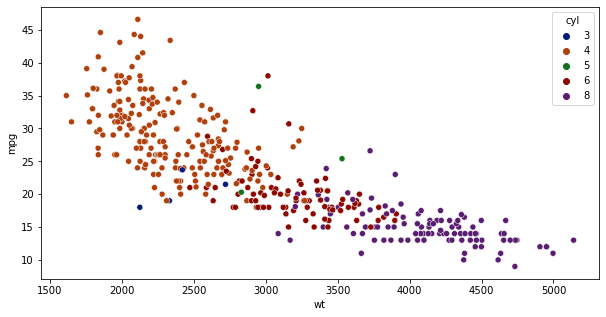

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = car_df,x = 'wt' ,y = 'mpg' , hue = 'cyl',palette='dark');

## Part 1.2 g- Share insights for Q2.f.

- The features 'wt' and 'mpg' are negatively correlated
- At lower scales of both features are the datapoints are much faraway with each other and as long as the scale increases the datapoints are much closer
- The 'cyl' class '8' the dataponts are mostly located at high scales of features and much closer with each other
- The 'cyl' class '6' the datapoints are located in middle scale of features and closer but not much as class '8'
- The 'cyl' class '4' datapoints are located at start to mid of scales of features are far distributed and more number of datapoints are observed
- The 'cyl' class '3' and '5' are very less datapoints are observed

## Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

In [13]:
for i in car_df.columns:
        print("unique values in column {} are  : \n \n {}  \n \n " .format(i , car_df[i].unique()))

unique values in column car_name are  : 
 
 ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth 

- There is some unexpected values are present in 'hp' feature

In [14]:
car_df.dtypes #checking dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [15]:
# checking for unexpected values
x = pd.DataFrame(car_df.hp.str.isdigit())
car_df[x['hp']==False].hp.value_counts()

?    6
Name: hp, dtype: int64

In [16]:
car_df.hp.str.isdigit().value_counts()

False    6
Name: hp, dtype: int64

In [17]:
car_df['hp'] = car_df['hp'].replace('?',np.nan)
car_df[x['hp']==False]

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

In [18]:
car_df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

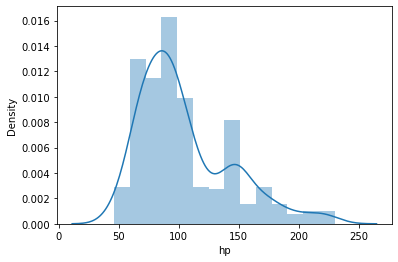

In [19]:
sns.distplot(car_df['hp']);

In [20]:
med = car_df.hp.median()
med

93.5

In [21]:
#replacing values with median
car_df.hp.fillna(med,inplace=True)
car_df[x['hp']==False]

car_name   mpg  cyl   disp    hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  93.5  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  93.5  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  93.5  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  93.5  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  93.5  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  93.5  3035  20.5  82       1

In [22]:
car_df.drop("car_name",axis= 1,inplace=True)

In [23]:
df = car_df.copy(deep = True)

In [24]:
car_df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

In [25]:
# before kmeans cluster implementation we applying zscore
car_df_scaled = car_df.apply(zscore)
car_df_scaled.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426   

     origin  
0 -0.715145  
1 -0.715145  
2 -0.715145  
3 -0.715145  
4 -0.715145

In [26]:
car_df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

## Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [27]:
clusters = np.arange(2,11)
meandistortions = []
for i in clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(car_df_scaled)
    prediction = kmeans.predict(car_df_scaled)
    meandistortions.append(kmeans.inertia_)

In [28]:
meandistortions

[1588.5924567918632,
 1190.0436525504851,
 1002.1021201664385,
 829.7157874488786,
 750.7544691583837,
 680.796515088602,
 633.427733343953,
 595.084503433752,
 559.9506925256943]

## Part 1.3 b - Plot a visual and find elbow point.

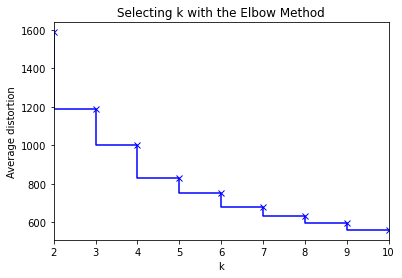

In [29]:
plt.step(clusters, meandistortions, 'bx-')
plt.xlim(2,10,1)
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

## Part 1.3 c - On the above visual, highlight which are the possible Elbow points.

- Possible elbow points are 4,5,6,7

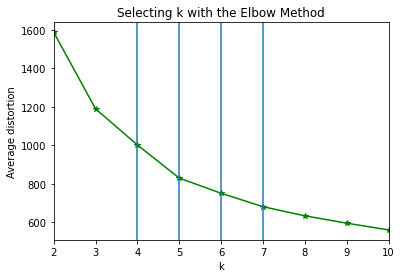

In [30]:
plt.plot(clusters, meandistortions, 'g*-')
plt.xlim(2,10,1)
plt.xlabel('k')
plt.axvline(x = 4)
plt.axvline(x = 5)
plt.axvline(x = 6)
plt.axvline(x = 7)
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

## Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [31]:
def train_fn(value):
    model = KMeans(n_clusters=value,init='k-means++',random_state=1)
    model.fit(car_df_scaled)
    model_pred = model.predict(car_df_scaled)
    labels = model.labels_
    centroids = model.cluster_centers_
    groups = pd.DataFrame(model_pred)
    score = silhouette_score(car_df_scaled,labels)
    print("silhouette score : \n " , score)
    return groups.value_counts()

In [32]:
train_fn(4)

silhouette score : 
  0.29920866135381


3    124
0     96
2     94
1     84
dtype: int64

In [33]:
train_fn(5)

silhouette score : 
  0.33296973781495653


1    94
4    84
0    81
3    72
2    67
dtype: int64

In [34]:
train_fn(6)

silhouette score : 
  0.33669964403455965


0    95
4    80
3    67
1    65
2    58
5    33
dtype: int64

In [35]:
train_fn(7)

silhouette score : 
  0.2948287491844161


6    75
5    66
0    63
1    60
4    58
2    42
3    34
dtype: int64

- By considering silhoutte score I am considering the 6 clusters
- Here as per the question , I need to check the best elbow point for 2 to 10 cluters,since 2 clusters have higher varaince and 10 have high accuracy I am not considering both of them as per given instrctions.

## Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [36]:
model_final = KMeans(n_clusters=6,init='k-means++',random_state=1) 
model_final.fit(car_df_scaled)
predictions = model_final.predict(car_df_scaled)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 4 4 1 5 5 1 5 1 4 0 0 0 0 1 5 1 5 4 4 4 4
 4 0 0 0 0 0 0 0 4 5 4 4 5 1 5 1 1 1 5 5 1 5 5 5 5 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 5 5 5 5 1 1 5 1 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 5 0 0 0 0 4 1 5 1
 1 5 4 1 0 0 5 1 1 1 0 1 1 0 4 4 4 4 3 5 3 5 4 4 4 0 0 0 0 0 1 1 1 3 3 5 1
 1 1 1 1 4 4 4 4 0 0 0 0 4 4 4 4 4 4 0 1 5 4 5 1 1 1 4 1 4 1 1 1 1 3 1 1 2
 5 1 0 0 0 0 4 4 4 4 5 5 1 3 4 4 4 4 1 3 1 2 1 0 5 1 4 0 0 0 0 3 2 3 2 3 0
 4 0 0 4 4 4 4 0 0 0 0 1 2 3 2 2 2 3 1 1 1 1 3 2 3 3 3 4 0 0 4 4 4 2 4 4 4
 4 4 4 0 4 0 0 2 1 1 2 1 2 2 1 1 4 1 4 3 3 4 4 2 4 4 4 0 0 0 0 0 4 0 3 3 2
 2 4 4 5 4 2 2 3 3 2 2 2 2 3 3 2 3 2 2 2 4 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 1 1 3 2 3 2 2 2 2 2 3 2 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 1 1 4 4 4 4 2 2 2
 2 2 2 2 2 3 3 3 2 2 3 3 3 3 3 3 2 2 2 2 3 2 2 2 3 2 2 2]


## Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [37]:
car_df['group'] = predictions
car_df.sample(10)

mpg  cyl   disp     hp    wt   acc  yr  origin  group
257  19.4    6  232.0   90.0  3210  17.2  78       1      4
389  22.0    6  232.0  112.0  2835  14.7  82       1      2
177  23.0    4  115.0   95.0  2694  15.0  75       2      1
45   18.0    6  258.0  110.0  2962  13.5  71       1      4
289  16.9    8  350.0  155.0  4360  14.9  79       1      0
104  12.0    8  400.0  167.0  4906  12.5  73       1      0
228  18.5    6  250.0   98.0  3525  19.0  77       1      4
147  24.0    4   90.0   75.0  2108  15.5  74       2      1
96   13.0    8  360.0  175.0  3821  11.0  73       1      0
347  37.0    4   85.0   65.0  1975  19.4  81       3      3

In [38]:
car_df_scaled['group'] = predictions
car_df_scaled.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426   

     origin  group  
0 -0.715145      0  
1 -0.715145      0  
2 -0.715145      0  
3 -0.715145      0  
4 -0.715145      0

In [39]:
(car_df_scaled.groupby('group').mean())*100

mpg         cyl        disp          hp          wt         acc  \
group                                                                           
0     -115.871315  149.819126  150.068407  151.412926  140.001604 -107.612225   
1       18.555913  -77.481824  -80.065984  -32.190627  -67.572986  -23.363222   
2       70.734326  -73.453548  -56.650226  -50.070929  -52.430102   10.235541   
3      145.048807  -82.996410  -91.475736  -91.893985  -96.598333   61.310445   
4      -55.799822   43.130309   36.825020   -8.573167   39.041058   41.732635   
5       13.477740  -85.632057  -78.291634  -77.120394  -76.307838  112.172692   

               yr      origin  
group                          
0      -67.255590  -71.514478  
1      -39.848288  114.780255  
2      108.975250  -71.514478  
3       95.108537  140.894196  
4      -10.426550  -65.272644  
5      -87.251293  -22.336393

In [40]:
car_df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  group
0  18.0    8  307.0  130.0  3504  12.0  70       1      0
1  15.0    8  350.0  165.0  3693  11.5  70       1      0
2  18.0    8  318.0  150.0  3436  11.0  70       1      0
3  16.0    8  304.0  150.0  3433  12.0  70       1      0
4  17.0    8  302.0  140.0  3449  10.5  70       1      0

## Part 1.3 f -Plot a visual and color the datapoints based upon clusters.

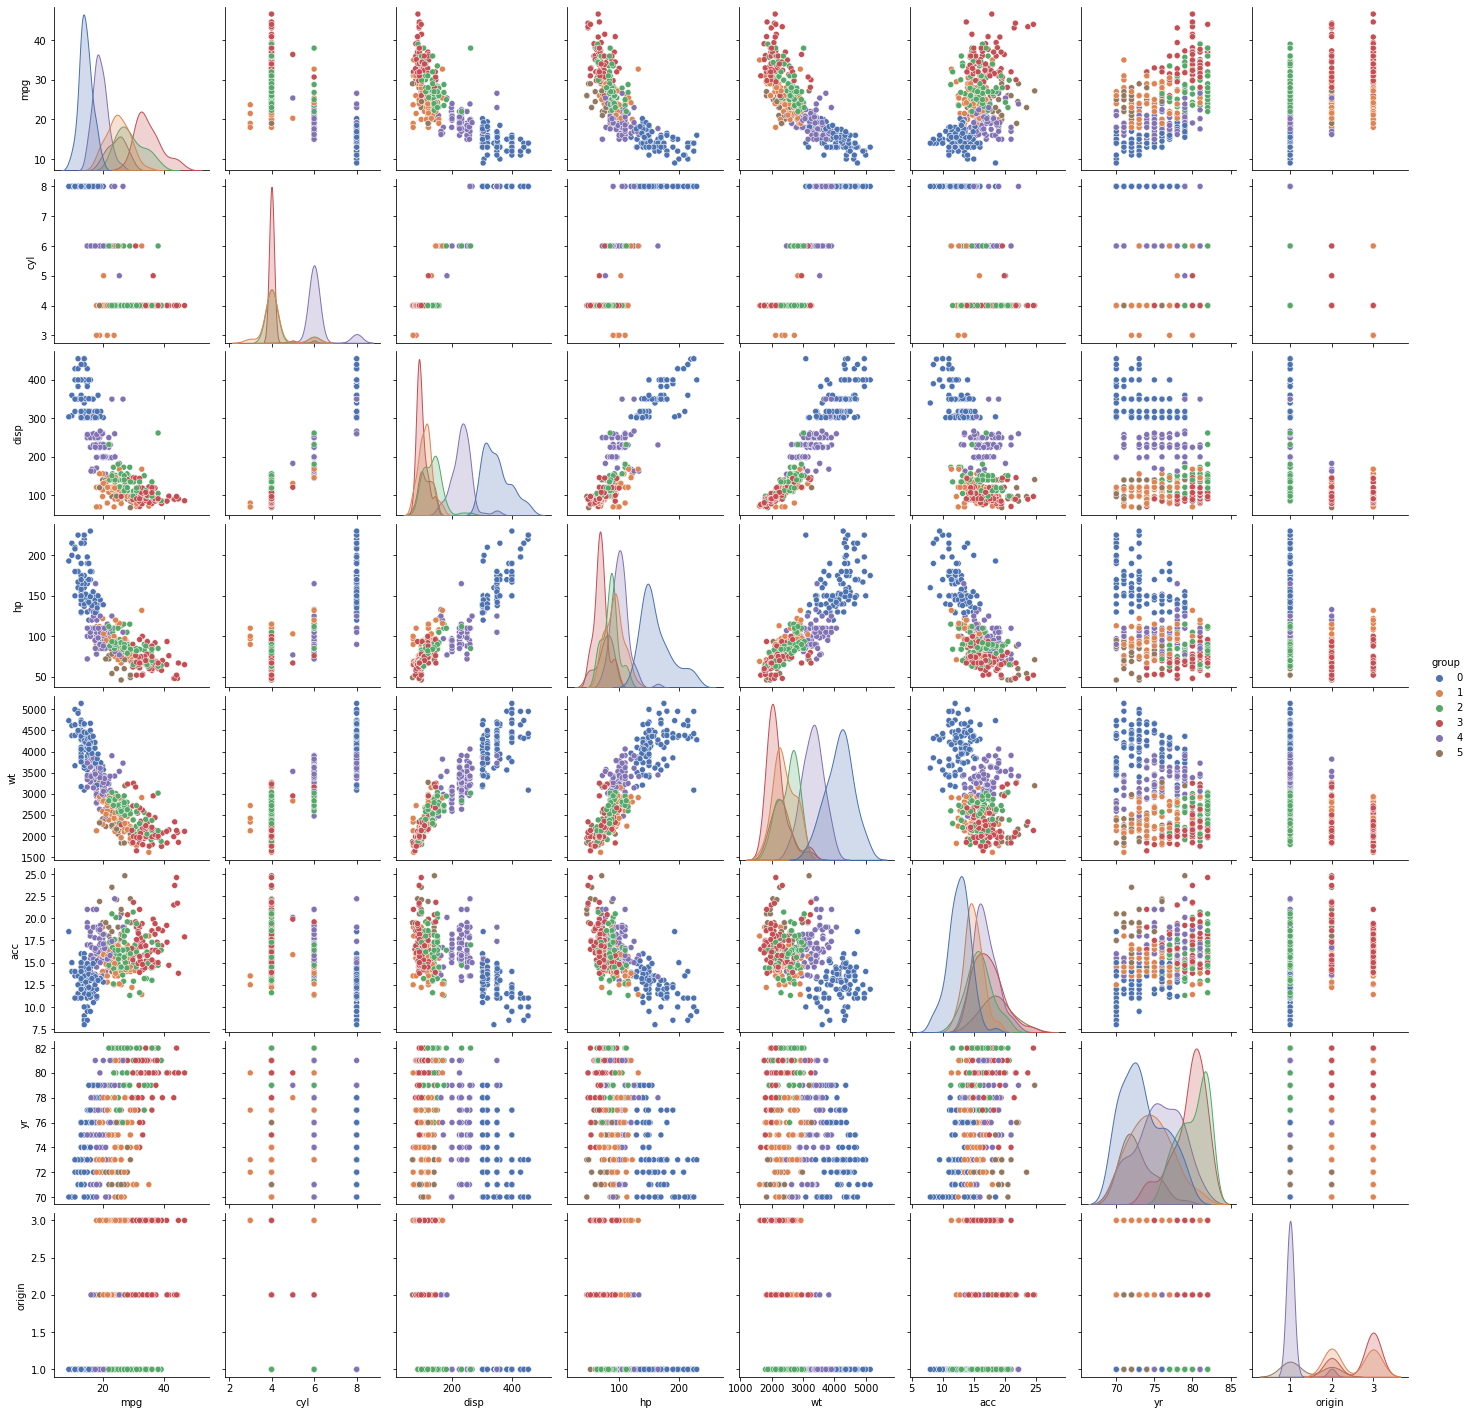

In [41]:
sns.pairplot(car_df,hue = 'group',palette='deep');

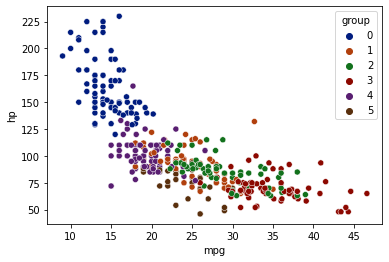

In [42]:
sns.scatterplot(data = car_df,x = 'mpg' , y = 'hp',hue = 'group',palette='dark');

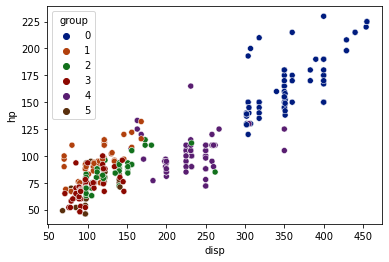

In [43]:
sns.scatterplot(data = car_df,x = 'disp' , y = 'hp',hue = 'group',palette='dark');

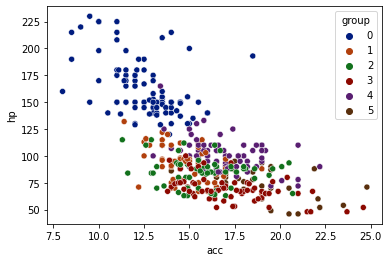

In [44]:
sns.scatterplot(data = car_df,x = 'acc' , y = 'hp',hue = 'group',palette='dark');

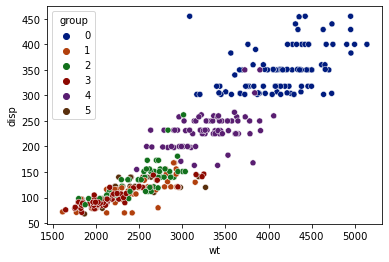

In [45]:
sns.scatterplot(data = car_df,x = 'wt' , y = 'disp',hue = 'group',palette='dark');

## Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to.

In [46]:
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

In [47]:
datapoint1 = {'mpg':15.0,'cyl':8,'disp':307.0,'hp':130.0,'wt':3504,'acc':12.0,'yr':70,'origin':1}

In [48]:
df = df.append(datapoint1,ignore_index=True)
df.tail()

mpg  cyl   disp     hp      wt   acc    yr  origin
394  44.0  4.0   97.0   52.0  2130.0  24.6  82.0     2.0
395  32.0  4.0  135.0   84.0  2295.0  11.6  82.0     1.0
396  28.0  4.0  120.0   79.0  2625.0  18.6  82.0     1.0
397  31.0  4.0  119.0   82.0  2720.0  19.4  82.0     1.0
398  15.0  8.0  307.0  130.0  3504.0  12.0  70.0     1.0

In [49]:
model = KMeans(n_clusters=6,init='k-means++',random_state=1)

In [50]:
df_scaled  = df.apply(zscore)
model.fit(df_scaled)
pred = model.predict(df_scaled)
print(pred)
df['clusters'] = pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 4 4 1 5 5 1 5 1 4 0 0 0 0 1 5 1 5 4 4 4 4
 4 0 0 0 0 0 0 0 4 5 4 4 5 1 5 1 1 1 5 5 1 5 5 5 5 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 5 5 5 5 1 1 5 1 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 5 0 0 0 0 4 1 5 1
 1 5 4 1 0 0 5 1 1 1 0 1 1 0 4 4 4 4 3 5 3 5 4 4 4 0 0 0 0 0 1 1 1 3 3 5 1
 1 1 1 1 4 4 4 4 0 0 0 0 4 4 4 4 4 4 0 1 5 4 5 1 1 1 4 1 4 1 1 1 1 3 1 1 2
 5 1 0 0 0 0 4 4 4 4 5 5 1 3 4 4 4 4 1 3 1 2 1 0 5 1 4 0 0 0 0 3 2 3 2 3 0
 4 0 0 4 4 4 4 0 0 0 0 1 2 3 2 2 2 3 1 1 1 1 3 2 3 3 3 4 0 0 4 4 4 2 4 4 4
 4 4 4 0 4 0 0 2 1 1 2 1 2 2 1 1 4 1 4 3 3 4 4 2 4 4 4 0 0 0 0 0 4 0 3 3 2
 2 4 4 5 4 2 2 3 3 2 2 2 2 3 3 2 3 2 2 2 4 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 1 1 3 2 3 2 2 2 2 2 3 2 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 1 1 4 4 4 4 2 2 2
 2 2 2 2 2 3 3 3 2 2 3 3 3 3 3 3 2 2 2 2 3 2 2 2 3 2 2 2 0]


In [51]:
df.head()

mpg  cyl   disp     hp      wt   acc    yr  origin  clusters
0  18.0  8.0  307.0  130.0  3504.0  12.0  70.0     1.0         0
1  15.0  8.0  350.0  165.0  3693.0  11.5  70.0     1.0         0
2  18.0  8.0  318.0  150.0  3436.0  11.0  70.0     1.0         0
3  16.0  8.0  304.0  150.0  3433.0  12.0  70.0     1.0         0
4  17.0  8.0  302.0  140.0  3449.0  10.5  70.0     1.0         0

In [52]:
df.tail()

mpg  cyl   disp     hp      wt   acc    yr  origin  clusters
394  44.0  4.0   97.0   52.0  2130.0  24.6  82.0     2.0         3
395  32.0  4.0  135.0   84.0  2295.0  11.6  82.0     1.0         2
396  28.0  4.0  120.0   79.0  2625.0  18.6  82.0     1.0         2
397  31.0  4.0  119.0   82.0  2720.0  19.4  82.0     1.0         2
398  15.0  8.0  307.0  130.0  3504.0  12.0  70.0     1.0         0

In [53]:
df.iloc[398,:].clusters

0.0

- The new datapoint belongs to the cluster named as 0

# PART-B

• DOMAIN: Automobile

• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette.

• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

## Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [54]:
veh_df = pd.read_csv('vehicle.csv')
veh_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

## Part 2.1 b- Check percentage of missing values and impute with correct approach.


In [55]:
print((veh_df.isnull().sum()/len(veh_df))*100)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [56]:
print(veh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [57]:
print(veh_df.isnull().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [58]:
veh_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [59]:
df_numerical = veh_df.select_dtypes(['float','int'])

In [60]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [61]:
def distplots(veh_df):
    df_numerical = veh_df.select_dtypes(['float','int'])
    count = 1
    i = 0
    plt.figure(figsize=(20,20))
    for j in df_numerical.columns:  
        plt.subplot(6,3,count)
        sns.distplot(df_numerical[j])
        count = count+1
    

<Figure size 1440x1440 with 0 Axes>

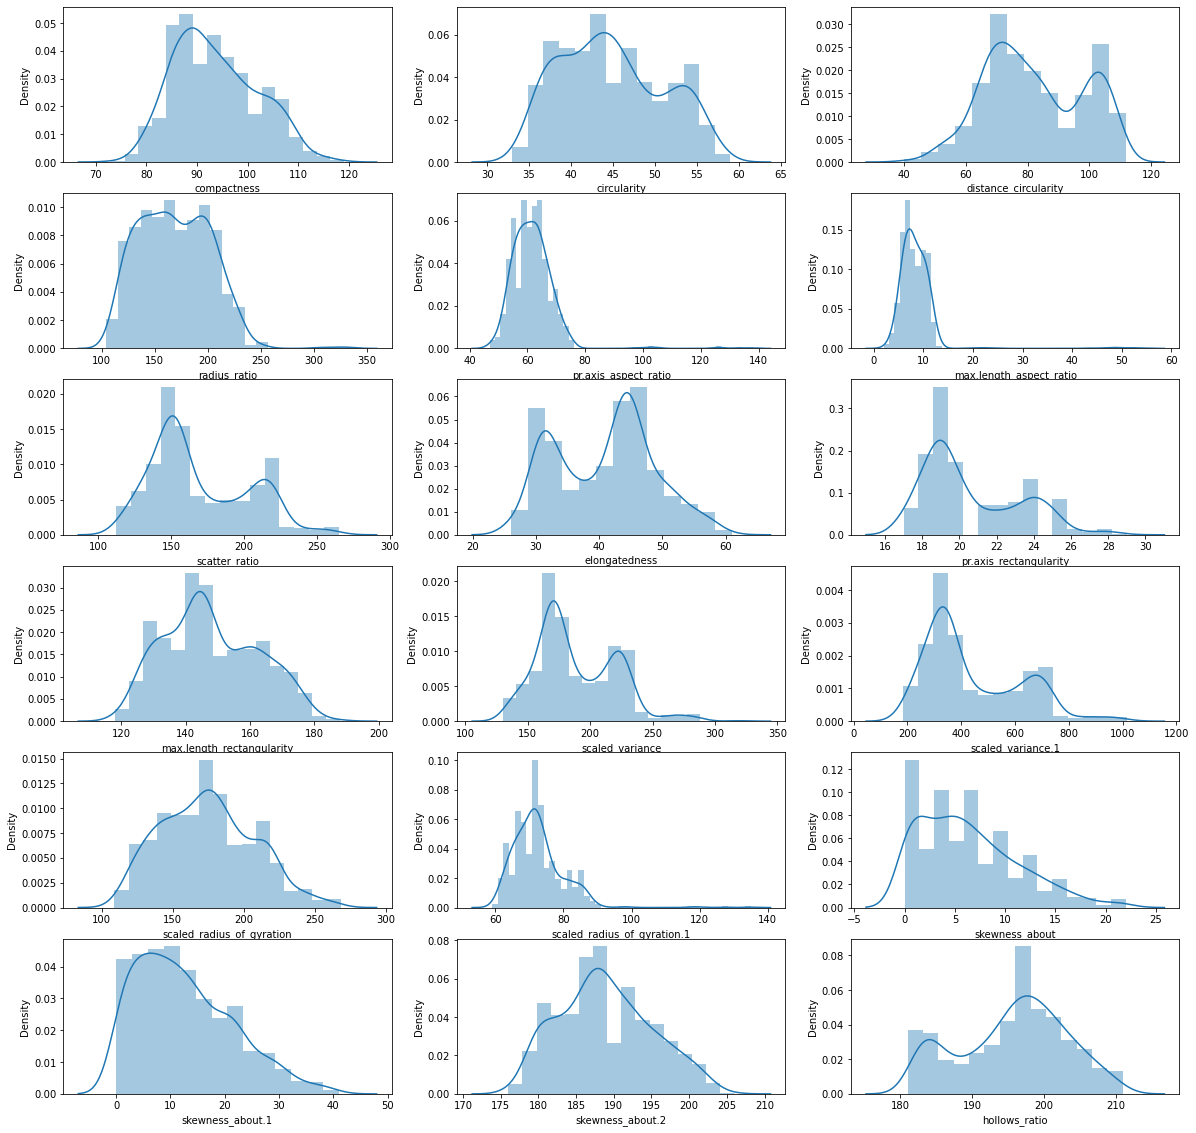

In [62]:
plt.figure(figsize=(20,20))
distplots(veh_df);

In [63]:
for x in veh_df.columns:
    if veh_df[x].isnull().sum() == 0 :
        print(x,"No imputation required")
    else:
        print("*"*30)
        print(x,"imputation required")
        veh_df[x].fillna(veh_df[x].median(),inplace=True)

compactness No imputation required
******************************
circularity imputation required
******************************
distance_circularity imputation required
******************************
radius_ratio imputation required
******************************
pr.axis_aspect_ratio imputation required
max.length_aspect_ratio No imputation required
******************************
scatter_ratio imputation required
******************************
elongatedness imputation required
******************************
pr.axis_rectangularity imputation required
max.length_rectangularity No imputation required
******************************
scaled_variance imputation required
******************************
scaled_variance.1 imputation required
******************************
scaled_radius_of_gyration imputation required
******************************
scaled_radius_of_gyration.1 imputation required
******************************
skewness_about imputation required
******************************
skewn

In [64]:
veh_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

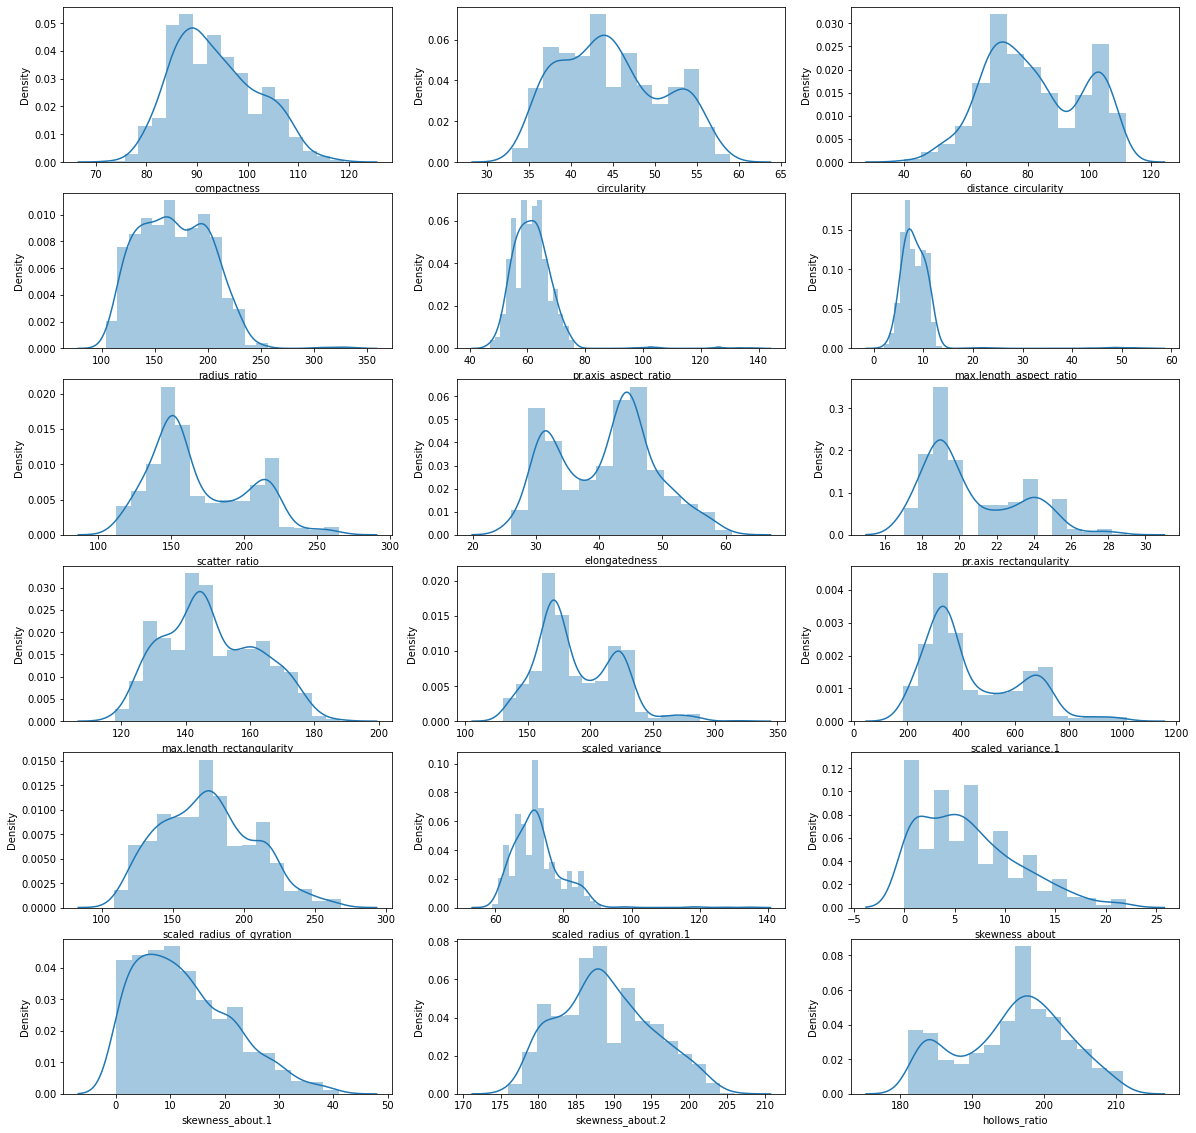

In [65]:
distplots(veh_df)

## Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.

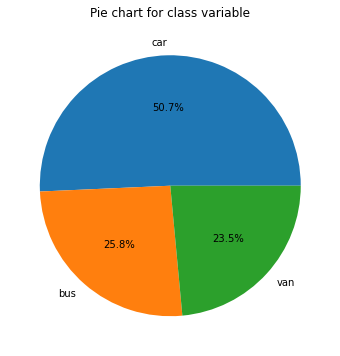

In [66]:
plt.figure(figsize=(6,6))
plt.pie(veh_df['class'].value_counts(),labels=veh_df['class'].value_counts().index,autopct='%1.1f%%')
plt.title("Pie chart for class variable",loc='center');

- More number of vehicles are cars are about 50.7%
- bus and van are 25.8% and 23.5% respectively

<Figure size 2160x2160 with 0 Axes>

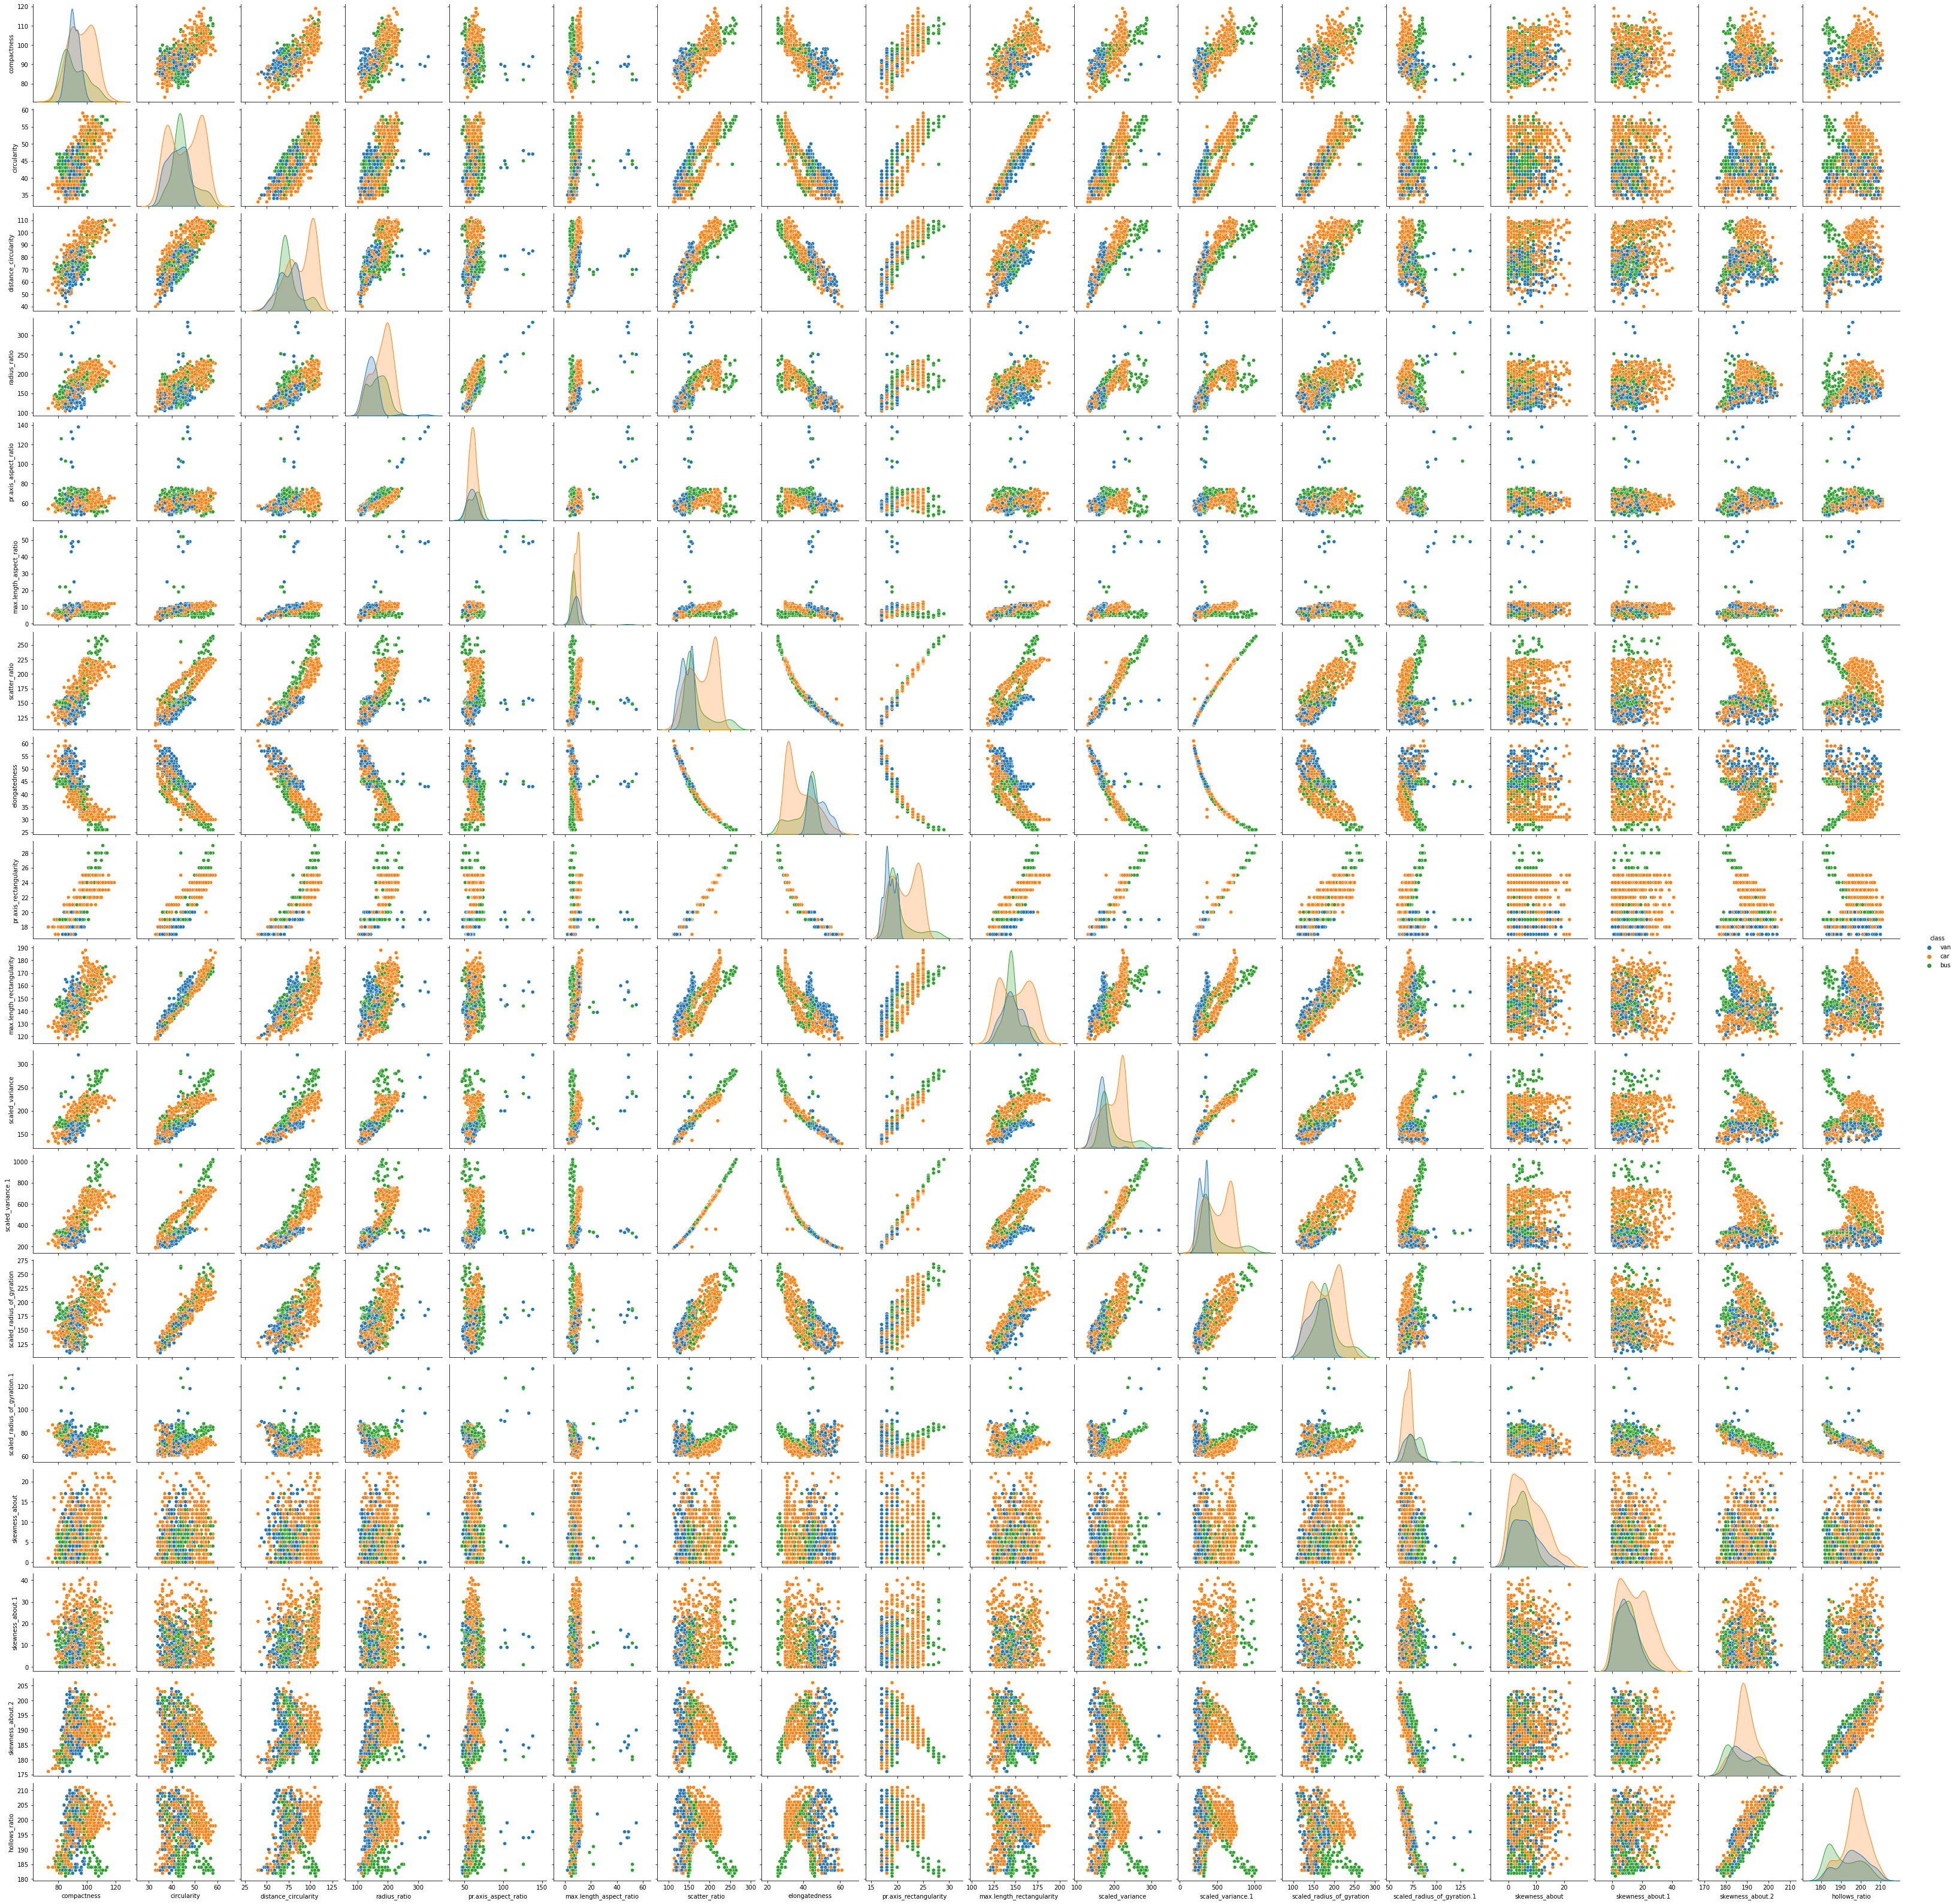

In [67]:
plt.figure(figsize=(30,30))
sns.pairplot(veh_df,hue='class');

## Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.

In [68]:
print(veh_df.duplicated().sum())

0


- There is no Dublicate rows in vehicle dataframe

## Part 2.2 a - Split data into X and Y.

In [69]:
X = veh_df.drop('class',axis =1)
Y = veh_df['class']
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [70]:
Y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

## Part 2.2 b - Standardize the Data.

In [71]:
X_scaled = X.apply(zscore)
X_scaled.head(2)

compactness  circularity  distance_circularity  radius_ratio  \
0      0.16058     0.518073              0.057177      0.273363   
1     -0.32547    -0.623732              0.120741     -0.835032   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977

## Part 2.3 a - Train a base Classification model using SVM.

## Part 2.3 b - Print Classification metrics for train data.

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1)
x_train.shape,y_train.shape

((676, 18), (676,))

In [73]:
svm_base = SVC(random_state=1) #svm base model

In [74]:
labels = Y.value_counts().index

In [75]:
def train_model_scores(model,x_tr,y_tr,x_ts,y_ts):
    model.fit(x_tr,y_tr)         # training svm model
    pred_tr = model.predict(x_tr)
    pred_ts = model.predict(x_ts)
    print(model)
    print("--"*30)
    print("the accuracy score of Training : " ,round(model.score(x_tr,y_tr),4))
    print("the accuracy score of Testing :  " , round(model.score(x_ts,y_ts),4))

In [76]:
def train_model_metrics(model,x_tr,y_tr,x_ts,y_ts):
    model.fit(x_tr,y_tr)
    pred_tr = model.predict(x_tr)
    pred_ts = model.predict(x_ts)
    print("Training model")
    print("*-"*30)
    print("the accuracy score of model : \n" , model.score(x_tr,y_tr))
    print("**"*30)
    print("The classification report as : \n" , classification_report(y_tr,pred_tr))
    print("**"*30)
    print("The confusion matrix as : \n" )
    cm_tr = confusion_matrix(y_tr,pred_tr)
    print(cm_tr)
    print("--"*50)
    print("Testing model")
    print("*"*30)
    print("the accuracy score of model : \n" , model.score(x_ts,y_ts))
    print("**"*30)
    print("The classification report as : \n" , classification_report(y_ts,pred_ts))
    print("**"*30)
    print("The confusion matrix as : \n" )
    cm_ts = confusion_matrix(y_ts,pred_ts)
    print(cm_ts)

In [77]:
train_model_metrics(svm_base,x_train,y_train,x_test,y_test)

Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.9807692307692307
************************************************************
The classification report as : 
               precision    recall  f1-score   support

         bus       0.99      0.98      0.98       181
         car       0.99      0.99      0.99       339
         van       0.96      0.97      0.96       156

    accuracy                           0.98       676
   macro avg       0.98      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676

************************************************************
The confusion matrix as : 

[[177   1   3]
 [  1 335   3]
 [  1   4 151]]
----------------------------------------------------------------------------------------------------
Testing model
******************************
the accuracy score of model : 
 0.9588235294117647
************************************************************
The c

## Part 2.3 c - Apply PCA on the data with 10 components.

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10,random_state=1)
pca.fit(X_scaled)

PCA(n_components=10, random_state=1)

In [79]:
pca.components_ #eigen vectors

array([[ 2.75283688e-01,  2.93258469e-01,  3.04609128e-01,
         2.67606877e-01,  8.05039890e-02,  9.72756855e-02,
         3.17092750e-01, -3.14133155e-01,  3.13959064e-01,
         2.82830900e-01,  3.09280359e-01,  3.13788457e-01,
         2.72047492e-01, -2.08137692e-02,  4.14555082e-02,
         5.82250207e-02,  3.02795063e-02,  7.41453913e-02],
       [-1.26953763e-01,  1.25576727e-01, -7.29516436e-02,
        -1.89634378e-01, -1.22174860e-01,  1.07482875e-02,
         4.81181371e-02,  1.27498515e-02,  5.99352482e-02,
         1.16220532e-01,  6.22806229e-02,  5.37843596e-02,
         2.09233172e-01,  4.88525148e-01, -5.50899716e-02,
        -1.24085090e-01, -5.40914775e-01, -5.40354258e-01],
       [-1.19922479e-01, -2.48205467e-02, -5.60143254e-02,
         2.75074211e-01,  6.42012966e-01,  5.91801304e-01,
        -9.76283108e-02,  5.76484384e-02, -1.09512416e-01,
        -1.70641987e-02,  5.63239801e-02, -1.08840729e-01,
        -3.14636493e-02,  2.86277015e-01, -1.15679354e

In [80]:
pca.explained_variance_ #eigen value

array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263, 0.35887012, 0.22193246, 0.1606086 , 0.09185722])

In [81]:
pca.explained_variance_ratio_   #explained variance

array([0.52186034, 0.16729768, 0.10562639, 0.0654746 , 0.05089869,
       0.02996413, 0.01991366, 0.01231501, 0.00891215, 0.00509715])

In [82]:
np.cumsum(pca.explained_variance_ratio_) #cummulative explained variance

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549, 0.97335049, 0.98226265, 0.98735979])

## Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components.

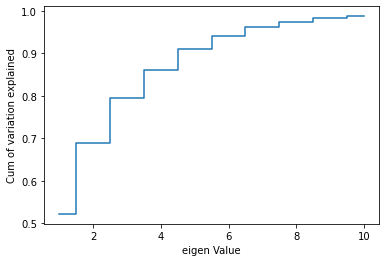

In [83]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value');

In [84]:
z = np.cumsum(pca.explained_variance_ratio_)*100
print(z)

[52.18603365 68.9158021  79.47844095 86.02590063 91.11576952 94.11218252
 96.10354875 97.33504945 98.22626473 98.73597943]


## Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

In [85]:
m =90

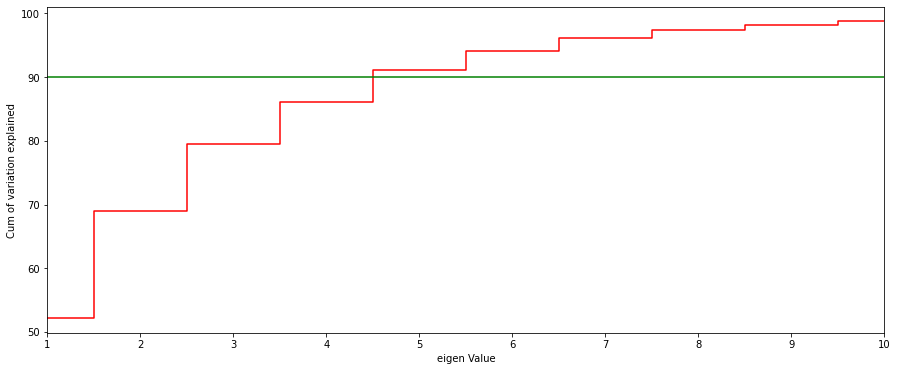

In [86]:
plt.figure(figsize=(15,6))
plt.step(list(range(1,11)),z,'red',where = 'mid')
plt.xlim(1,10)
plt.xticks(np.arange(1,11,1))
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value');
plt.hlines(m,xmin=0,xmax=11,colors='green');

## Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [87]:
pca_final = PCA(n_components=5,random_state=1)
pca_final.fit(X_scaled)

PCA(n_components=5, random_state=1)

In [88]:
X_pca = pca_final.transform(X_scaled) #tranforming into new varibalbles

In [89]:
X_pca

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007080e-02],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652323e-01, -1.34423636e+00],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680054e-02],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510367e-02]])

In [90]:
X_pca_df = pd.DataFrame(X_pca)

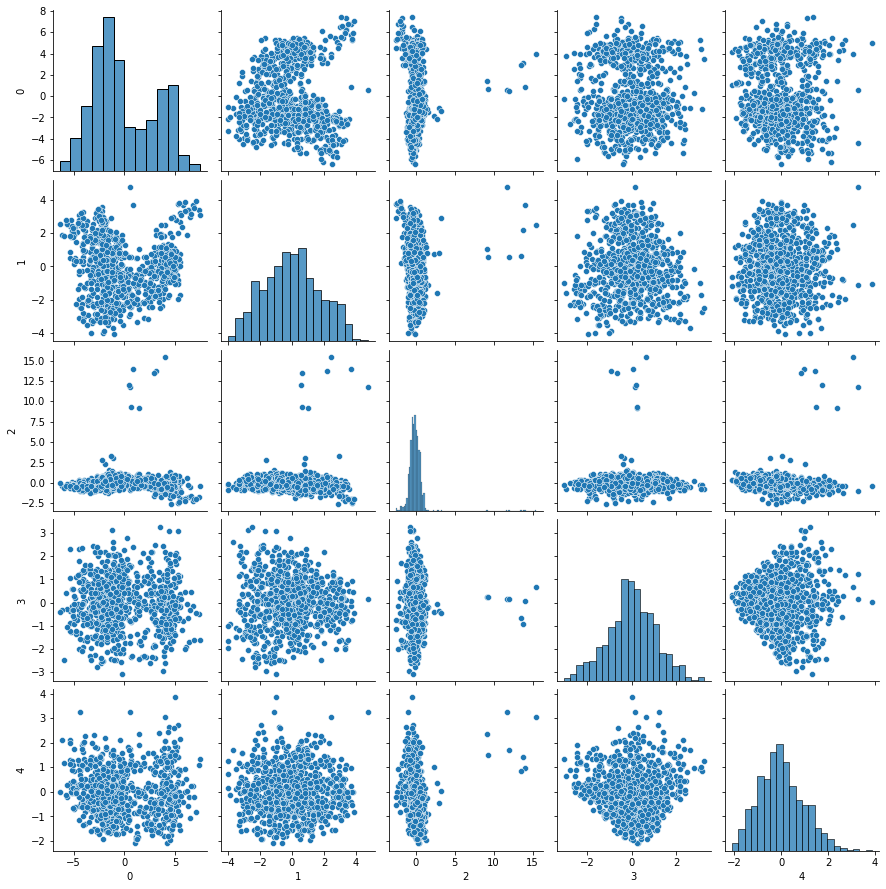

In [91]:
sns.pairplot(X_pca_df);

In [92]:
x_train_psm,x_test_psm,y_train_psm,y_test_psm = train_test_split(X_pca,Y,random_state=1,test_size=0.2)

## Part 2.3 g - Train SVM model on components selected from above step.

##  Part 2.3 h - Print Classification metrics for train data of above model and share insights.

In [93]:
svm_psm = SVC(random_state=1)

#### Training the svm model and on number of componenets = 5 and classification metrics of the model

In [94]:
train_model_metrics(svm_psm,x_train_psm,y_train_psm,x_test_psm,y_test_psm)  # training model and classification metrics

Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.8017751479289941
************************************************************
The classification report as : 
               precision    recall  f1-score   support

         bus       0.82      0.70      0.75       181
         car       0.85      0.88      0.86       339
         van       0.68      0.76      0.72       156

    accuracy                           0.80       676
   macro avg       0.79      0.78      0.78       676
weighted avg       0.80      0.80      0.80       676

************************************************************
The confusion matrix as : 

[[126  31  24]
 [ 11 297  31]
 [ 17  20 119]]
----------------------------------------------------------------------------------------------------
Testing model
******************************
the accuracy score of model : 
 0.7764705882352941
************************************************************
The c

In [95]:
train_model_scores(svm_base,x_train,y_train,x_test,y_test)

SVC(random_state=1)
------------------------------------------------------------
the accuracy score of Training :  0.9808
the accuracy score of Testing :   0.9588


In [96]:
train_model_scores(svm_psm,x_train_psm,y_train_psm,x_test_psm,y_test_psm)

SVC(random_state=1)
------------------------------------------------------------
the accuracy score of Training :  0.8018
the accuracy score of Testing :   0.7765


### Obsevations

- The accuracy score of Training data is reduced by 18% i.e. 80 % after applying PCA components on base model of SVM
- The accuracy score of Testing data is also reduced by almost 18% i.e. 78% after applying PCA components
- Over all we loss some amount information by applying PCA components.
- But we Managed to get information almost 80% accuracy by 5 dimensions.

## Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [97]:
kernals = ['linear', 'poly', 'rbf', 'sigmoid']
for x in kernals:
    svm = SVC(kernel=x)
    svm.fit(x_train_psm,y_train_psm)
    print("Testing performance when kernal is {} then {}: " .format(x, svm.score(x_test_psm,y_test_psm)))


Testing performance when kernal is linear then 0.6647058823529411: 
Testing performance when kernal is poly then 0.6588235294117647: 
Testing performance when kernal is rbf then 0.7764705882352941: 
Testing performance when kernal is sigmoid then 0.5529411764705883: 


- by the above data we can conclude that when kernal is rbf it has higher accuracy

In [98]:
C = [0.1,1,10,100]
for x in C:
    svm = SVC(C=x)
    svm.fit(x_train_psm,y_train_psm)
    print("Training performance when C is {} then {}: " .format(x, svm.score(x_train_psm,y_train_psm)))
    print("Testing performance when C is {} then {}: " .format(x, svm.score(x_test_psm,y_test_psm)))
    print("*"*30)


Training performance when C is 0.1 then 0.6967455621301775: 
Testing performance when C is 0.1 then 0.6882352941176471: 
******************************
Training performance when C is 1 then 0.8017751479289941: 
Testing performance when C is 1 then 0.7764705882352941: 
******************************
Training performance when C is 10 then 0.863905325443787: 
Testing performance when C is 10 then 0.8294117647058824: 
******************************
Training performance when C is 100 then 0.9038461538461539: 
Testing performance when C is 100 then 0.8352941176470589: 
******************************


- By above data we can say C = 10 is the best parameter

In [99]:
gamma = ['scale', 'auto']
for x in gamma:
    svm = SVC(C=10,gamma = x)
    svm.fit(x_train_psm,y_train_psm)
    print("Training performance when gamma is {} then {}: " .format(x, svm.score(x_train_psm,y_train_psm)))
    print("Testing performance when gamma is {} then {}: " .format(x, svm.score(x_test_psm,y_test_psm)))
    print("*"*30)

Training performance when gamma is scale then 0.863905325443787: 
Testing performance when gamma is scale then 0.8294117647058824: 
******************************
Training performance when gamma is auto then 0.9349112426035503: 
Testing performance when gamma is auto then 0.8235294117647058: 
******************************


## Part 2.4 b- Share best Parameters observed from above step.

The best parameters are 

       - Kernal is rbf
       - The C value is 10
       - The gamma is auto

In [100]:
svm_psm_final = SVC(kernel='rbf',C=10,gamma='scale',random_state=1)
svm_psm_final.fit(x_train_psm,y_train_psm)
print("Training score : " ,svm_psm_final.score(x_train_psm,y_train_psm))
print("Testing score : " ,svm_psm_final.score(x_test_psm,y_test_psm))

Training score :  0.863905325443787
Testing score :  0.8294117647058824


## Part 2.4 c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [101]:
train_model_metrics(svm_psm_final,x_train_psm,y_train_psm,x_test_psm,y_test_psm)

Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.863905325443787
************************************************************
The classification report as : 
               precision    recall  f1-score   support

         bus       0.84      0.83      0.84       181
         car       0.89      0.92      0.90       339
         van       0.83      0.79      0.81       156

    accuracy                           0.86       676
   macro avg       0.85      0.84      0.85       676
weighted avg       0.86      0.86      0.86       676

************************************************************
The confusion matrix as : 

[[150  23   8]
 [ 10 311  18]
 [ 18  15 123]]
----------------------------------------------------------------------------------------------------
Testing model
******************************
the accuracy score of model : 
 0.8294117647058824
************************************************************
The cl

In [102]:
def models_scores():
    print("*-*"*40)
    print("The accuracy score for base model ")
    train_model_scores(svm_base,x_train,y_train,x_test,y_test)
    print("--"*40)
    print("The accuracy score for base model after PCA")
    train_model_scores(svm_psm,x_train_psm,y_train_psm,x_test_psm,y_test_psm)
    print("--"*40)
    print("The accuracy score for model after PCA with tuning parameters")
    print("--"*40)
    train_model_scores(svm_psm_final,x_train_psm,y_train_psm,x_test_psm,y_test_psm)

In [103]:
models_scores()

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
The accuracy score for base model 
SVC(random_state=1)
------------------------------------------------------------
the accuracy score of Training :  0.9808
the accuracy score of Testing :   0.9588
--------------------------------------------------------------------------------
The accuracy score for base model after PCA
SVC(random_state=1)
------------------------------------------------------------
the accuracy score of Training :  0.8018
the accuracy score of Testing :   0.7765
--------------------------------------------------------------------------------
The accuracy score for model after PCA with tuning parameters
--------------------------------------------------------------------------------
SVC(C=10, random_state=1)
------------------------------------------------------------
the accuracy score of Training :  0.8639
the accuracy score of Testing :   0.8294


 ## Observations
 
 - The Accuracy score for base model of SVM is nearly 98% on training and 96% on testing
 - After we performig the PCA analysis and the number of components taken, 
 
      - The Accuracy of Training score is drop by 18%  i.e.(80%) 
      - The Testing score also drop by nearly 18% i.e. (78%)
 - After PCA analysis we performed some tuning parameters like C ,gamma and kernal,
      - we observed improvement in the training score as 86% 
      - Testing performance increased by 6% i.e. (83%)

## Part 2.5 a - Explain pre-requisite/assumptions of PCA.

- PCA assumes correlation between features
- If we see in a pair plot there are so many columns are LINEARLY CORRELATED to each other,it may impact the model performance
  Thats why here we are performing PCA analysis
- In this dataset most of the columns are following Normal distribution
- we assumed to take the number of components as 10 out of all 17 available feature components(except the target class)
- After applying PCA of 10 components on SVM model , we taken the 5 components which are above 90% by the plot(% cummulative variation vs Eigen values    explained)
- we reduced the 17 dimesnsions to 5 orthogonal dimensions

## Part 2.5 b - Explain advantages and limitations of PCA.

### Advantages

- We reduced the number of dimensions i.e we reduced the 17 dimesnsions to 5 orthogonal dimensions.
- We removed correlated attributes by applying PCA and created new attributes.
- we improved the performance of SVM algoritham in terms of computational time since we taken lesser dimensions.
- The accuracy we got base SVM alogoritham on all dimensions ,we got above 80% accuracy by taking the 5 dimensions.

### Limitations

- Data normalization must be applied.
- The New five variables are less interpretable.
- we lost some amount of information as accuracy reduced from 98% to 86% for training and 96% to 83% for testing data
- PCA not robust to outliers
- PCA not well suited for Non linear relationships